In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [4]:
stablo = load('stabla.joblib')
knn = load('knn.joblib')


In [5]:
models = stablo + knn

In [6]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data.columns

Index(['Unnamed: 0', 'gender', 'age', 'height(cm)', 'weight(kg)',
       'eyesight(left)', 'hearing(left)', 'hearing(right)', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'Gtp',
       'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [7]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [8]:
Y = data['smoking']
X = data.drop('smoking', axis=1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=12)

/home/ivana/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/ivana/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


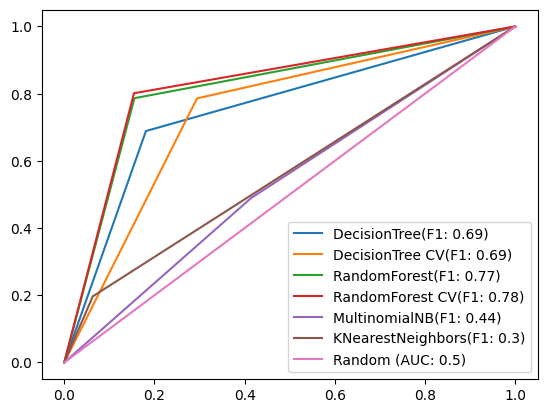

In [16]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV', 'MultinomialNB', 'KNearestNeighbors', 'KNearestNeighbors CV']

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)  # Dodajemo izračunavanje F1-score
    lab = model_name + "(F1: " + str(round(f1, 2)) + ")"  # Prikazujemo F1-score umesto AUC
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')  # Prikazujemo istu random krivu, iako koristimo F1-score
plt.legend()
plt.show()
